In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler
# from sklearn.impute import KNNImputer

#model selection from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#pca
from sklearn.decomposition import PCA
#data_balance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
import os
os.chdir(r'C:\Users\Prabhakaran\Documents\GitHub\CAPSTONE\Data')

In [5]:
df=pd.read_csv('./train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
df.shape

(233154, 41)

### Attribute description

In [7]:
df.corr()['loan_default'].abs().sort_values(ascending=False)

loan_default                           1.000000
ltv                                    0.098208
disbursed_amount                       0.077675
PERFORM_CNS.SCORE                      0.057929
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
Aadhar_flag                            0.041593
PRI.ACTIVE.ACCTS                       0.041451
PRI.OVERDUE.ACCTS                      0.040872
PRI.NO.OF.ACCTS                        0.035456
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
UniqueID                               0.033848
branch_id                              0.030193
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.029400
Current_pincode_ID                     0.028419
PRI.CURRENT.BALANCE                    0.027386
supplier_id                            0.027357
manufacturer_id                        0.025039
Employee_code_ID                       0.020657
asset_cost                             0

## Data Wrangling

In [8]:
temp_col = ['PERFORM_CNS.SCORE.DESCRIPTION']
df[temp_col] = df[temp_col].replace('No Bureau History Available', 0)
df[temp_col] = df[temp_col].replace('Not Scored: Sufficient History Not Available',0)
df[temp_col] = df[temp_col].replace('Not Scored: Not Enough Info available on the customer',0)
df[temp_col] = df[temp_col].replace('Not Scored: No Activity seen on the customer (Inactive)',0) 
df[temp_col] = df[temp_col].replace('Not Scored: No Updates available in last 36 months',0) 
df[temp_col] = df[temp_col].replace('Not Scored: Only a Guarantor', 0)
df[temp_col] = df[temp_col].replace('Not Scored: More than 50 active Accounts found',0)
df[temp_col] = df[temp_col].replace('M-Very High Risk', 1)
df[temp_col] = df[temp_col].replace('L-Very High Risk', 1)
df[temp_col] = df[temp_col].replace('K-High Risk', 2)
df[temp_col] = df[temp_col].replace('J-High Risk', 2)
df[temp_col] = df[temp_col].replace('I-Medium Risk', 3)
df[temp_col] = df[temp_col].replace('H-Medium Risk', 3)
df[temp_col] = df[temp_col].replace('G-Low Risk', 4)
df[temp_col] = df[temp_col].replace('F-Low Risk', 4)
df[temp_col] = df[temp_col].replace('E-Low Risk', 4)
df[temp_col] = df[temp_col].replace('D-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('C-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('B-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('A-Very Low Risk', 5)

In [9]:
df['Employment.Type'].fillna('Others',inplace=True)
df['Employment.Type'].value_counts()
df['Employment.Type']=df['Employment.Type'].replace({'Self employed':0, 'Salaried':1 ,'Others':2})

In [10]:
df.rename(columns={'Employment.Type':'Employment_Type'},inplace=True)

In [11]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [12]:
df['Avg_Loan_tenure'] = df['AVERAGE.ACCT.AGE'].apply(duration)
df['Time_since_1st_loan'] = df['CREDIT.HISTORY.LENGTH'].apply(duration)

In [13]:
df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [14]:
def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)

In [15]:
df['Age_at_disbursal']=df['DisbursalDate']-df['Date.of.Birth']

In [16]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Avg_Loan_tenure,Time_since_1st_loan,Age_at_disbursal
0,420825,50578,58400,89.55,67,22807,45,1441,1984,1,2018,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,537409,47145,65550,73.23,67,22807,45,1502,1985,0,2018,6,1998,1,1,0,0,0,0,598,3,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,23,23,33
2,417566,53278,61360,89.63,67,22807,45,1497,1985,0,2018,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
3,624493,57513,66113,88.48,67,22807,45,1501,1993,0,2018,6,1998,1,1,0,0,0,0,305,1,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,8,15,25
4,539055,52378,60300,88.39,67,22807,45,1495,1977,0,2018,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,41


In [17]:
numerical = ['disbursed_amount','asset_cost','ltv','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT',
             'PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
             'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT']

In [18]:
categorical = ['branch_id','supplier_id','manufacturer_id','Current_pincode_ID','Employment_Type',
              'State_ID','Employee_code_ID','MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag',
               'Driving_flag','Passport_flag','PERFORM_CNS.SCORE.DESCRIPTION','PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS',
               'PRI.OVERDUE.ACCTS','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS',
              'NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES',
              'Avg_Loan_tenure','Time_since_1st_loan','Age_at_disbursal']

## Feature Engineering

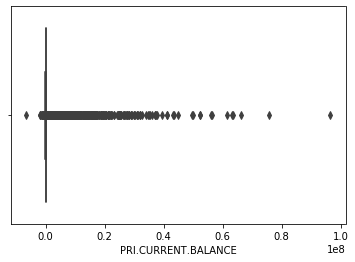

In [19]:
sns.boxplot(df['PRI.CURRENT.BALANCE'])

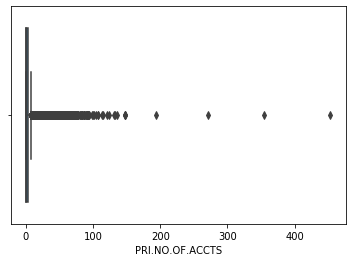

In [20]:
sns.boxplot(df['PRI.NO.OF.ACCTS'])

In [21]:
df.drop(df[df['PRI.NO.OF.ACCTS']>=50].index,inplace=True)

In [22]:
df.shape

(232919, 42)

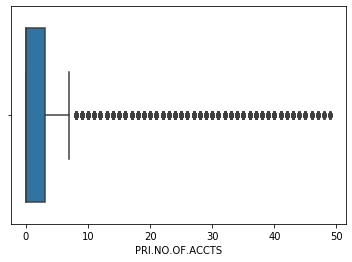

In [23]:
sns.boxplot(df['PRI.NO.OF.ACCTS'])

In [24]:
lower={}
upper={}
for i in numerical:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        lower[i]=q1 - iqr * 1.5
        upper[i]=q3 + iqr * 1.5

In [25]:
df['flag']=0
for row in df.index:
    count=0
    for col in numerical:
        if (df.loc[row,col] < lower[col]) or (df.loc[row,col] > upper[col]) :
            count+=1
        if count>=5:
            df.loc[row,'flag'] = 1

In [26]:
df['flag'].value_counts()

0    228243
1      4676
Name: flag, dtype: int64

In [27]:
df.drop(df.loc[df['flag']==1].index,axis=0,inplace=True)

In [28]:
df.shape

(228243, 43)

### Stats Test

In [29]:
l=[]

In [30]:
from scipy.stats import ttest_ind

for i in numerical:
    df1=df.groupby('loan_default').get_group(0)
    df2=df.groupby('loan_default').get_group(1)
    pvalue=ttest_ind(df1[i],df2[i])[1]
    if pvalue>0.05:
        l.append(i)

In [31]:
from scipy.stats import chi2_contingency

for i in categorical:
    pvalue  = chi2_contingency(pd.crosstab(df['loan_default'],df[i]))[1]
    if pvalue>0.05:
        l.append(i)

In [32]:
print("Non-significant features",l)

Non-significant features ['SEC.CURRENT.BALANCE', 'SEC.INSTAL.AMT', 'MobileNo_Avl_Flag', 'PAN_flag', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS']


In [44]:
l.append('loan_default')

In [45]:
l

['SEC.CURRENT.BALANCE',
 'SEC.INSTAL.AMT',
 'MobileNo_Avl_Flag',
 'PAN_flag',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'loan_default']

In [46]:
X = df.drop(l,axis=1)
y = df['loan_default']

### Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [51]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [52]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print("Recall :",recall_score(y_test,y_pred),"\n")
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy train: 0.6048657785325761 

accuracy test: 0.5650840477268413 

precision : 0.2797713746980143 

Recall : 0.6403236682400539 

f1 score: 0.38940375625358814 

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='bes